In [17]:
from preproccessing.preprocess import *
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('airline-price-prediction.csv')
data.head()

,date,airline,ch_code,num_code,dep_time,time_taken,stop,arr_time,type,route,price
0,5/3/2022,Vistara,UK,812,9:45,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,business,"{'source': 'Bangalore', 'destination': 'Hydera...","56,588"
1,18-03-2022,Vistara,UK,975,5:45,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:15,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}","59,649"
2,9/3/2022,GO FIRST,G8,7537,14:30,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:40,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}","3,916"
3,15-03-2022,GO FIRST,G8,287,10:40,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:20,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}","6,031"
4,22-03-2022,Vistara,UK,826,12:30,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}","7,081"


In [18]:
y = data['price']
y = y.str.replace(',', '')
y = y.str.replace('.', '')
y = y.astype(float)
data.drop(columns=['price'], inplace=True)

In [19]:
data = adjust_date(data)
data = adjust_route(data)
data = adjust_stop(data)
data = adjust_time(data)

In [20]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

In [21]:
cat_cols = ['airline', 'ch_code', 'stop', 'type', 'source', 'destination']

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state = 42)

le_dict = {}
for col in cat_cols:
    le_dict[col] = LabelEncoder().fit(X_train[col])
    X_train[col] = le_dict[col].transform(X_train[col])
    X_test[col] = le_dict[col].transform(X_test[col])
X_train.head()

,airline,ch_code,num_code,stop,type,day,month,source,destination,dep_time_hours,dep_time_min,arr_time_hours,arr_tim_min
39067,3,1,417,0,1,4,3,4,3,15,0,22,20
164447,0,2,806,0,1,28,3,5,1,8,0,12,40
94742,1,4,541,0,1,6,3,4,0,5,25,11,15
4773,7,7,898,0,1,17,3,3,5,7,40,16,30
222915,7,7,826,0,0,15,3,1,2,12,30,21,55


In [22]:
X_train.nunique()

airline              8
ch_code              8
num_code          1243
stop                 3
type                 2
day                 31
month                2
source               6
destination          6
dep_time_hours      24
dep_time_min        12
arr_time_hours      24
arr_tim_min         13
dtype: int64

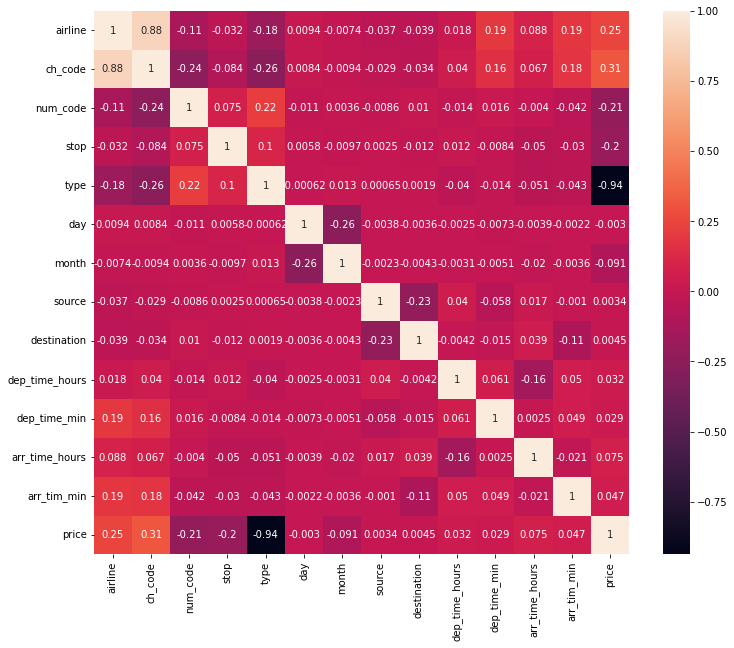

In [6]:
corr_data = pd.concat([X_train, y_train], axis=1)
corr = corr_data.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True)
top_feature = corr.index[abs(corr['price'])>0.2][:-1]


In [7]:
#top_feature = ['airline', 'ch_code', 'num_code', 'stop', 'type']
top_feature = X_train.columns
X_train_fs, X_test_fs = X_train[top_feature], X_test[top_feature]
cat_cols = [col for col in X_train_fs.columns if X_train_fs[col].nunique() < 10]
#cat_cols = ['airline', 'ch_code', 'stop', 'type', 'month', 'source', 'destination']

In [16]:
cat_cols

['airline', 'ch_code', 'stop', 'type', 'month', 'source', 'destination']

In [8]:
SI = SimpleImputer(strategy='most_frequent')
SI.fit(X_train_fs[X_train_fs.columns])
X_train_fs[X_train_fs.columns] = SI.transform(X_train_fs[X_train_fs.columns])
X_test_fs[X_test_fs.columns] = SI.transform(X_test_fs[X_test_fs.columns])

In [9]:
X_train_fs2, X_test_fs2 = X_train_fs[cat_cols], X_test_fs[cat_cols]
X_train_fs.drop(columns=cat_cols, inplace=True)
X_test_fs.drop(columns=cat_cols, inplace=True)
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', dtype=np.int)
X_train_fs2 = ohe.fit_transform(X_train_fs2).toarray()
X_test_fs2 = ohe.transform(X_test_fs2).toarray()
X_train_fs = X_train_fs.to_numpy()
X_test_fs = X_test_fs.to_numpy()
X_train_fs = np.concatenate((X_train_fs, X_train_fs2), axis=1)
X_test_fs = np.concatenate((X_test_fs, X_test_fs2), axis=1)

In [10]:
SC = StandardScaler()
X_train_fs = SC.fit_transform(X_train_fs)
X_test_fs = SC.transform(X_test_fs)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [15]:
X_train_fs.shape

(192166, 34)

In [24]:
from sklearn.metrics import r2_score

while True:
 print("Polynomial Linear Regression press(1)")
 print("Multiable Linear Regression press(2)")
 print("Exit press(0)")
 
 choice=int(input("      Your Choise... "))
 if choice==0:
     break
 if choice==1:
     print("------------------Polynomial Linear Regression------------------")
     poly_features = PolynomialFeatures(degree=2)

     # transforms the existing features to higher degree features.
     X_train_poly = poly_features.fit_transform(X_train_fs)

     # fit the transformed features to Linear Regression
     poly_model = linear_model.LinearRegression()
     startTrain = time.time()
     poly_model.fit(X_train_poly, y_train)
     endTrain = time.time()
     startTest = time.time()
     pickle.dump(poly_features, open('polyfeatures.pkl','wb'))
     pickle.dump(poly_model, open('polymodel.pkl','wb'))
     # predicting on training data-set
     y_train_predicted = poly_model.predict(X_train_poly)
     # predicting on test data-set
     prediction = poly_model.predict(poly_features.transform(X_test_fs))
     endTest=time.time()

    # print('Co-efficient of Polynomial regression',poly_model.coef_)
    # print('Intercept of Polynomail regression model',poly_model.intercept_)
     print("----------------------------------------------------------------")
     print('Mean Square Error ', metrics.mean_squared_error(y_test, prediction))
     print("----------------------------------------------------------------")
    # print('Accuracy', r2_score(y_test, prediction))
     print("----------------------------------------------------------------")
     print("Actual Time for Training", endTrain - startTrain)
     print("Actual Time for Prediction", endTest - startTest)
     print("----------------------------------------------------------------")
     actual_price = np.asarray(y_test)[0]
     predicted_value = prediction[0]
     print("Actual_Price = ", str(actual_price))
     print("Predicted_Price = ", str(predicted_value))
     print("----------------------------------------------------------------")


#################################
#################################
 else:
     print("------------------Multiable Linear Regression------------------")
     multi_model = linear_model.LinearRegression()
     startTrain=time.time()
     multi_model.fit(X_train_fs, y_train)
     endTrain=time.time()
     startTest=time.time()

     prediction_multi= multi_model.predict(X_test_fs)
     endTest=time.time()
     pickle.dump(multi_model, open('linearregression.pkl','wb'))

    # print('Co-efficient of Multiable regression',multi_model.coef_)
    # print('Intercept of linear regression model',multi_model.intercept_)
    
     print("----------------------------------------------------------------")

     print('Mean Square Error', metrics.mean_squared_error(np.asarray(y_test), prediction_multi))
     print("----------------------------------------------------------------")

     print("Actual Time for Training",endTrain-startTrain)
     print("Actual Time for Prediction",endTest-startTest)
     print("----------------------------------------------------------------")

     actual_price=np.asarray(y_test)[1]
     predicted_value=prediction_multi[1]
     print("Actual_Price = ",str(actual_price))
     print("Predicted_Price = ",str(predicted_value))
     print("----------------------------------------------------------------")
     print('Accuracy', r2_score(y_test, prediction_multi))
     print("----------------------------------------------------------------")
     print("----------------------------------------------------------------")

Polynomial Linear Regression press(1)
Multiable Linear Regression press(2)
Exit press(0)
------------------Polynomial Linear Regression------------------
Co-efficient of Polynomial regression [ 6.09103326e+12  8.08824679e+06 -1.21320598e+03  8.49757151e+07
  1.60977537e+07 -3.26867301e+07 -8.43066668e+06 -1.92550262e+10
  1.34564378e+10 -2.43693225e+08 -4.69617910e+09  5.56862887e+09
  1.17481736e+09  2.46974572e+08 -1.11177670e+09 -2.54527883e+08
 -1.54632959e+08  2.58290079e+08 -9.28760101e+07 -1.04877627e+09
  9.61686792e+08 -1.28449410e+09  1.59557307e+07 -6.89585745e+08
 -1.51719703e+08  5.52417020e+08 -5.40861905e+08  4.07000637e+08
  5.37107255e+09 -7.31203395e+08  1.99306614e+08  8.65095861e+08
  4.87514222e+08 -3.55704742e+08  1.38572359e+08  3.67813163e+01
  1.94849091e+01  4.62415285e+01  2.36410993e+01  1.29217368e+01
  1.60471764e+01  2.24937896e+08  3.64597376e+08  5.80099993e+08
  1.26807721e+08  2.06719770e+08  1.54352370e+07  4.73076486e+08
  1.03480102e+07  7.45717126

In [23]:
with open('labelencoder.pickle', 'wb') as handle:
    pickle.dump(le_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

pickle.dump(SC, open('scaler.pkl','wb'))
pickle.dump(ohe, open('onehotencoder.pkl','wb'))
pickle.dump(SI, open('simpleimputer.pkl','wb'))